In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import PowerTransformer
import time


<h2>Kanker Payudara

Data : https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/data


id: Pengenal unik untuk setiap catatan tumor.

diagnosis: Diagnosis tumor, di mana M berarti malignan (ganas) dan B berarti benign (jinak).

radius_mean: Rata-rata jarak dari pusat tumor ke tepi. Mencerminkan ukuran rata-rata tumor.

texture_mean: Rata-rata standar deviasi nilai skala abu-abu pada citra tumor. Mengukur kehalusan atau kekasaran tekstur tumor.

perimeter_mean: Rata-rata panjang keliling batas tumor. Mencerminkan rata-rata lingkar tumor.

area_mean: Rata-rata luas area yang ditempati tumor. Menunjukkan ukuran permukaan tumor secara rata-rata.

smoothness_mean: Rata-rata variasi lokal pada panjang radius. Mengukur seberapa halus permukaan tumor.

compactness_mean: Rata-rata kepadatan bentuk tumor. Menunjukkan seberapa padat atau bundar tumor tersebut.

concavity_mean: Rata-rata tingkat lekukan masuk (cekungan) pada tepi tumor. Mencerminkan seberapa dalam lekukan pada tepi tumor.

concave points_mean: Rata-rata jumlah titik cekung pada batas tumor. Menghitung jumlah lekukan pada tepi tumor.

symmetry_mean: Rata-rata simetri tumor. Mengukur seberapa simetris tumor terhadap pusatnya.

fractal_dimension_mean: Rata-rata dimensi fraktal, mencerminkan tingkat detail permukaan tumor.

radius_se: Galat baku pengukuran radius.

texture_se: Galat baku pengukuran tekstur.

perimeter_se: Galat baku pengukuran keliling.

area_se: Galat baku pengukuran area.

smoothness_se: Galat baku pengukuran kehalusan.

compactness_se: Galat baku pengukuran kepadatan bentuk.

concavity_se: Galat baku pengukuran cekungan.

concave points_se: Galat baku pengukuran titik cekung.

symmetry_se: Galat baku pengukuran simetri.

fractal_dimension_se: Galat baku pengukuran dimensi fraktal.

radius_worst: Nilai radius terbesar dari seluruh sampel.

texture_worst: Nilai tekstur terbesar dari seluruh sampel.

perimeter_worst: Nilai keliling terbesar dari seluruh sampel.

area_worst: Nilai area terbesar dari seluruh sampel.

smoothness_worst: Nilai kehalusan terbesar dari seluruh sampel.

compactness_worst: Nilai kepadatan bentuk terbesar dari seluruh sampel.

concavity_worst: Nilai cekungan terbesar dari seluruh sampel.

concave points_worst: Jumlah titik cekung terbanyak dari seluruh sampel.

symmetry_worst: Nilai simetri terbesar dari seluruh sampel.

fractal_dimension_worst: Nilai dimensi fraktal terbesar dari seluruh sampel.

In [98]:
df = pd.read_csv('breast-cancer.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [99]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<h1>Visualisasi

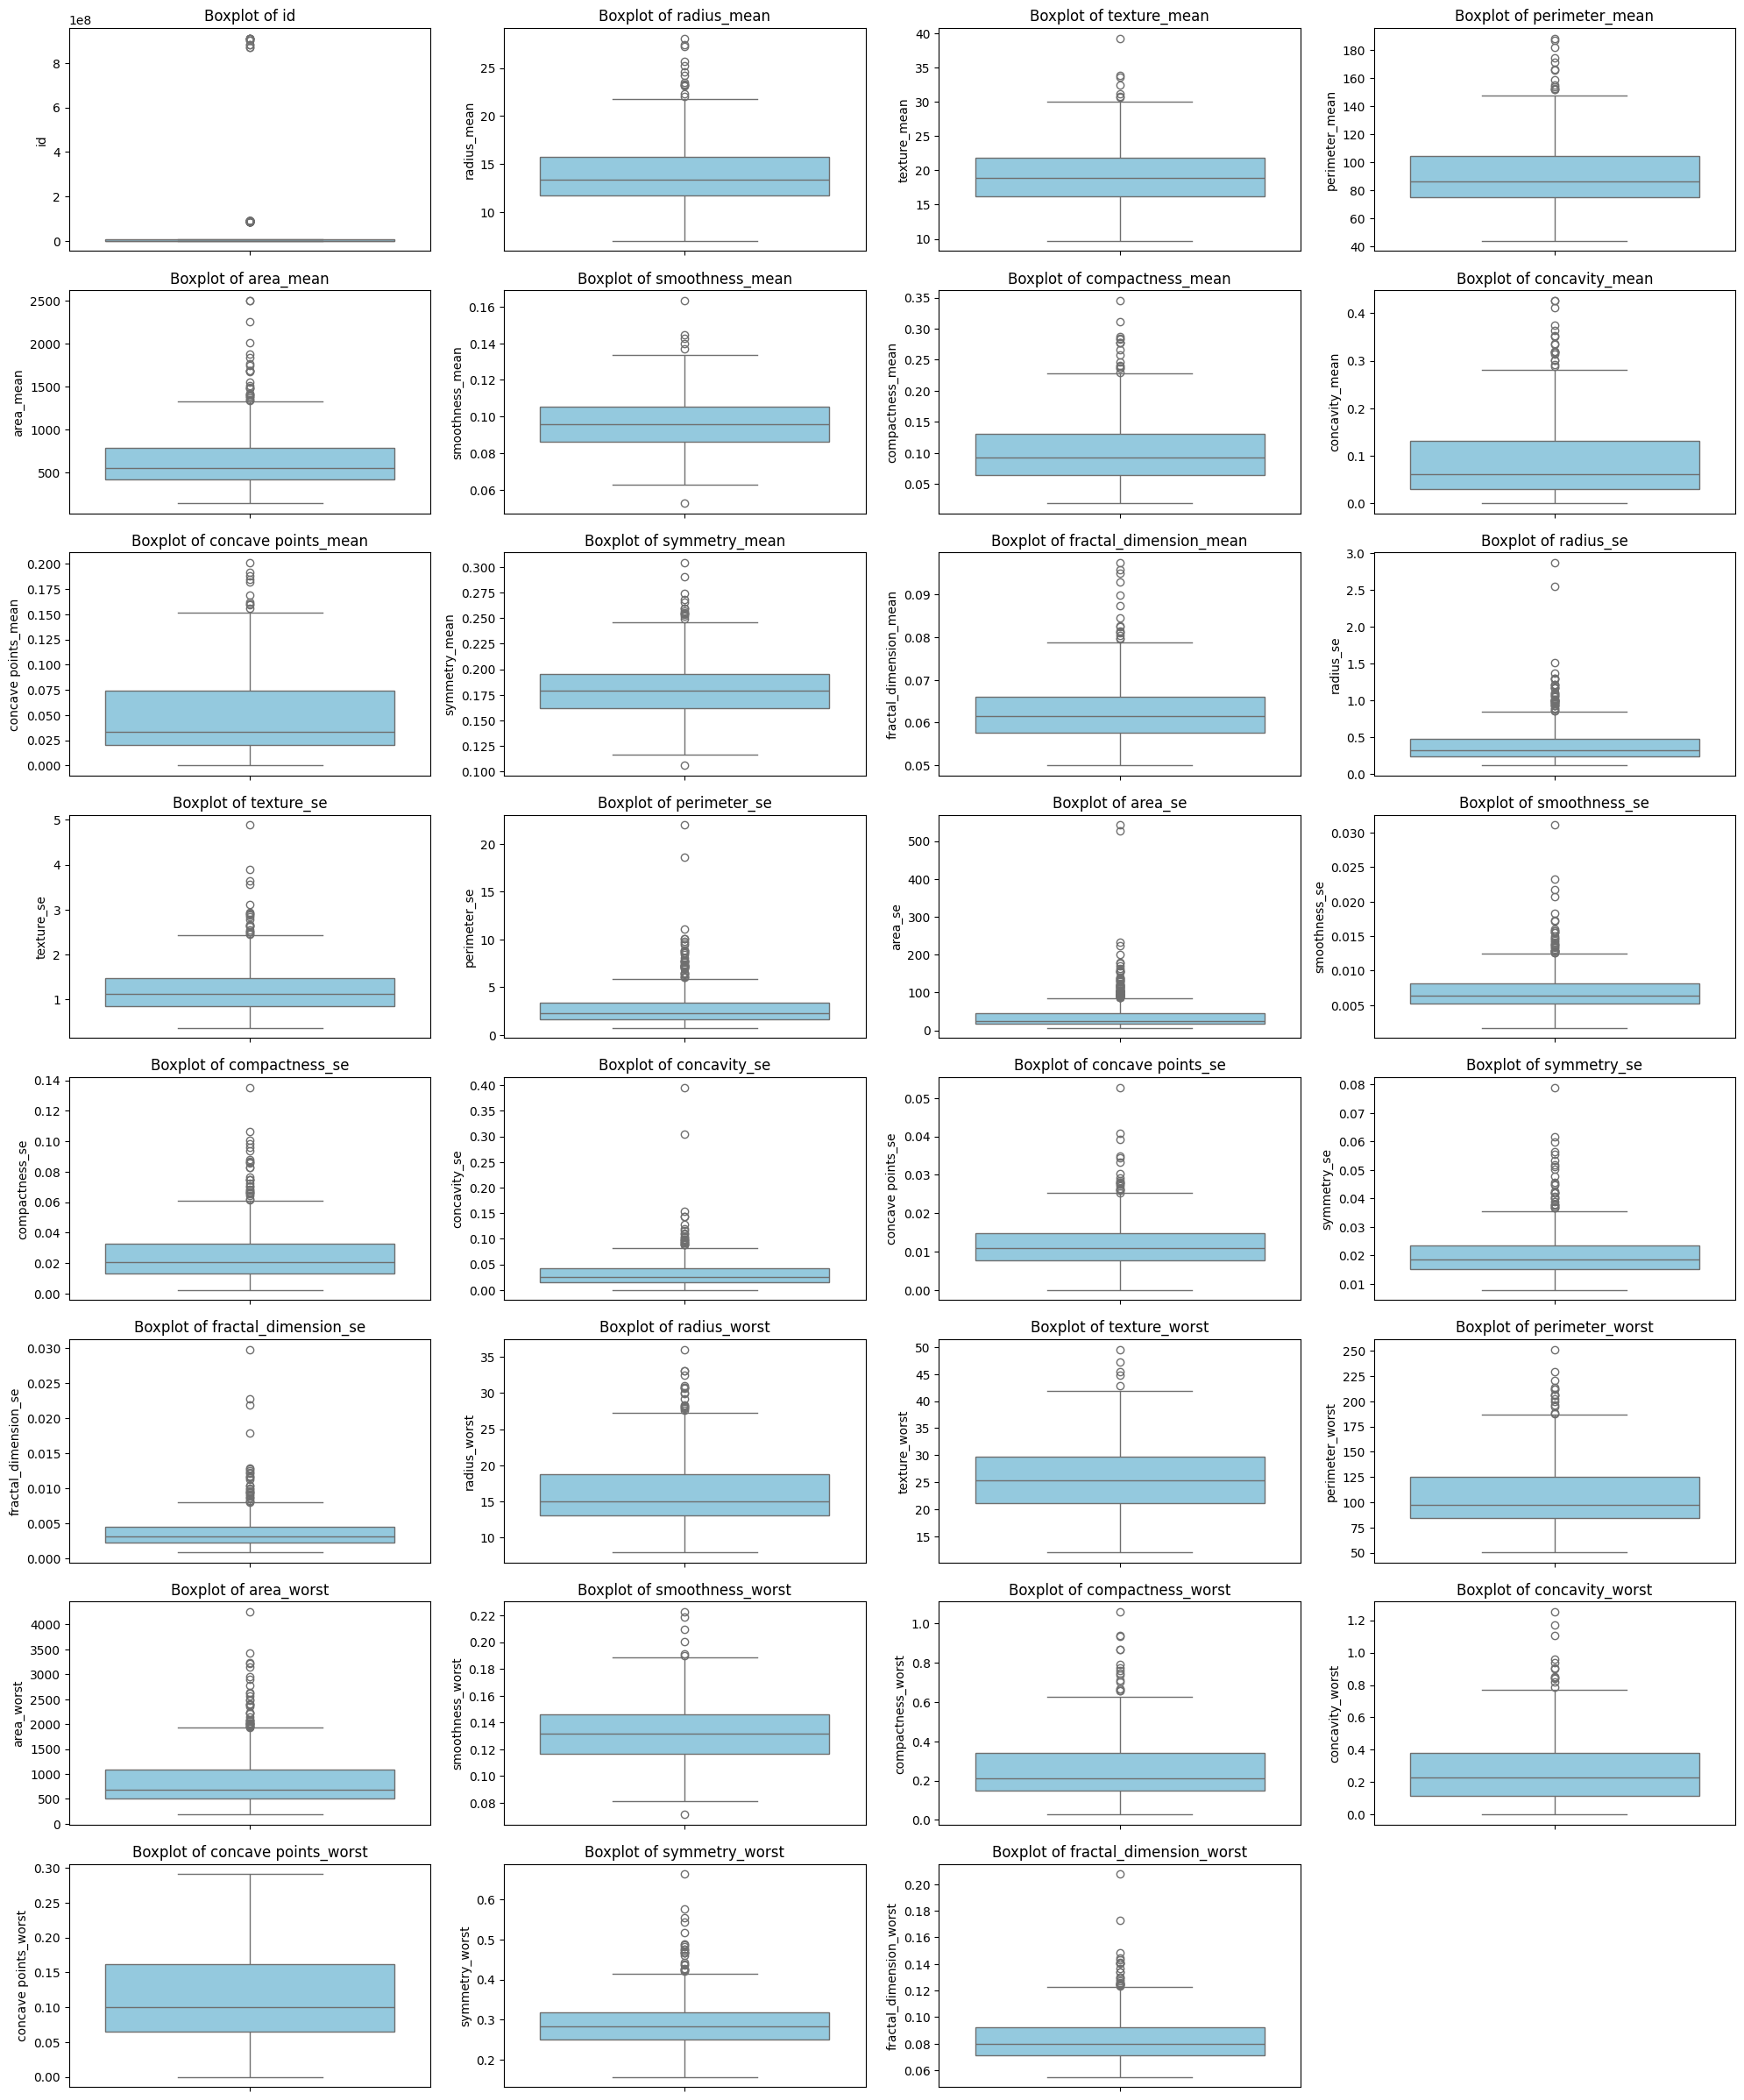

In [100]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(20, 30))
for i, column in enumerate(numeric_df.columns):
    plt.subplot(10, 4, i + 1)
    sns.boxplot(y=numeric_df[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()
    
plt.show()

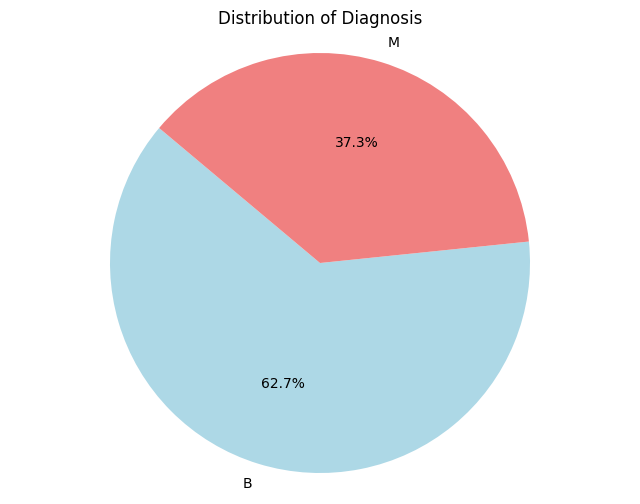

In [101]:
plt.figure(figsize=(8, 6))
plt.pie(df['diagnosis'].value_counts(), labels=df['diagnosis'].value_counts().index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Diagnosis')
plt.axis('equal')
plt.show()


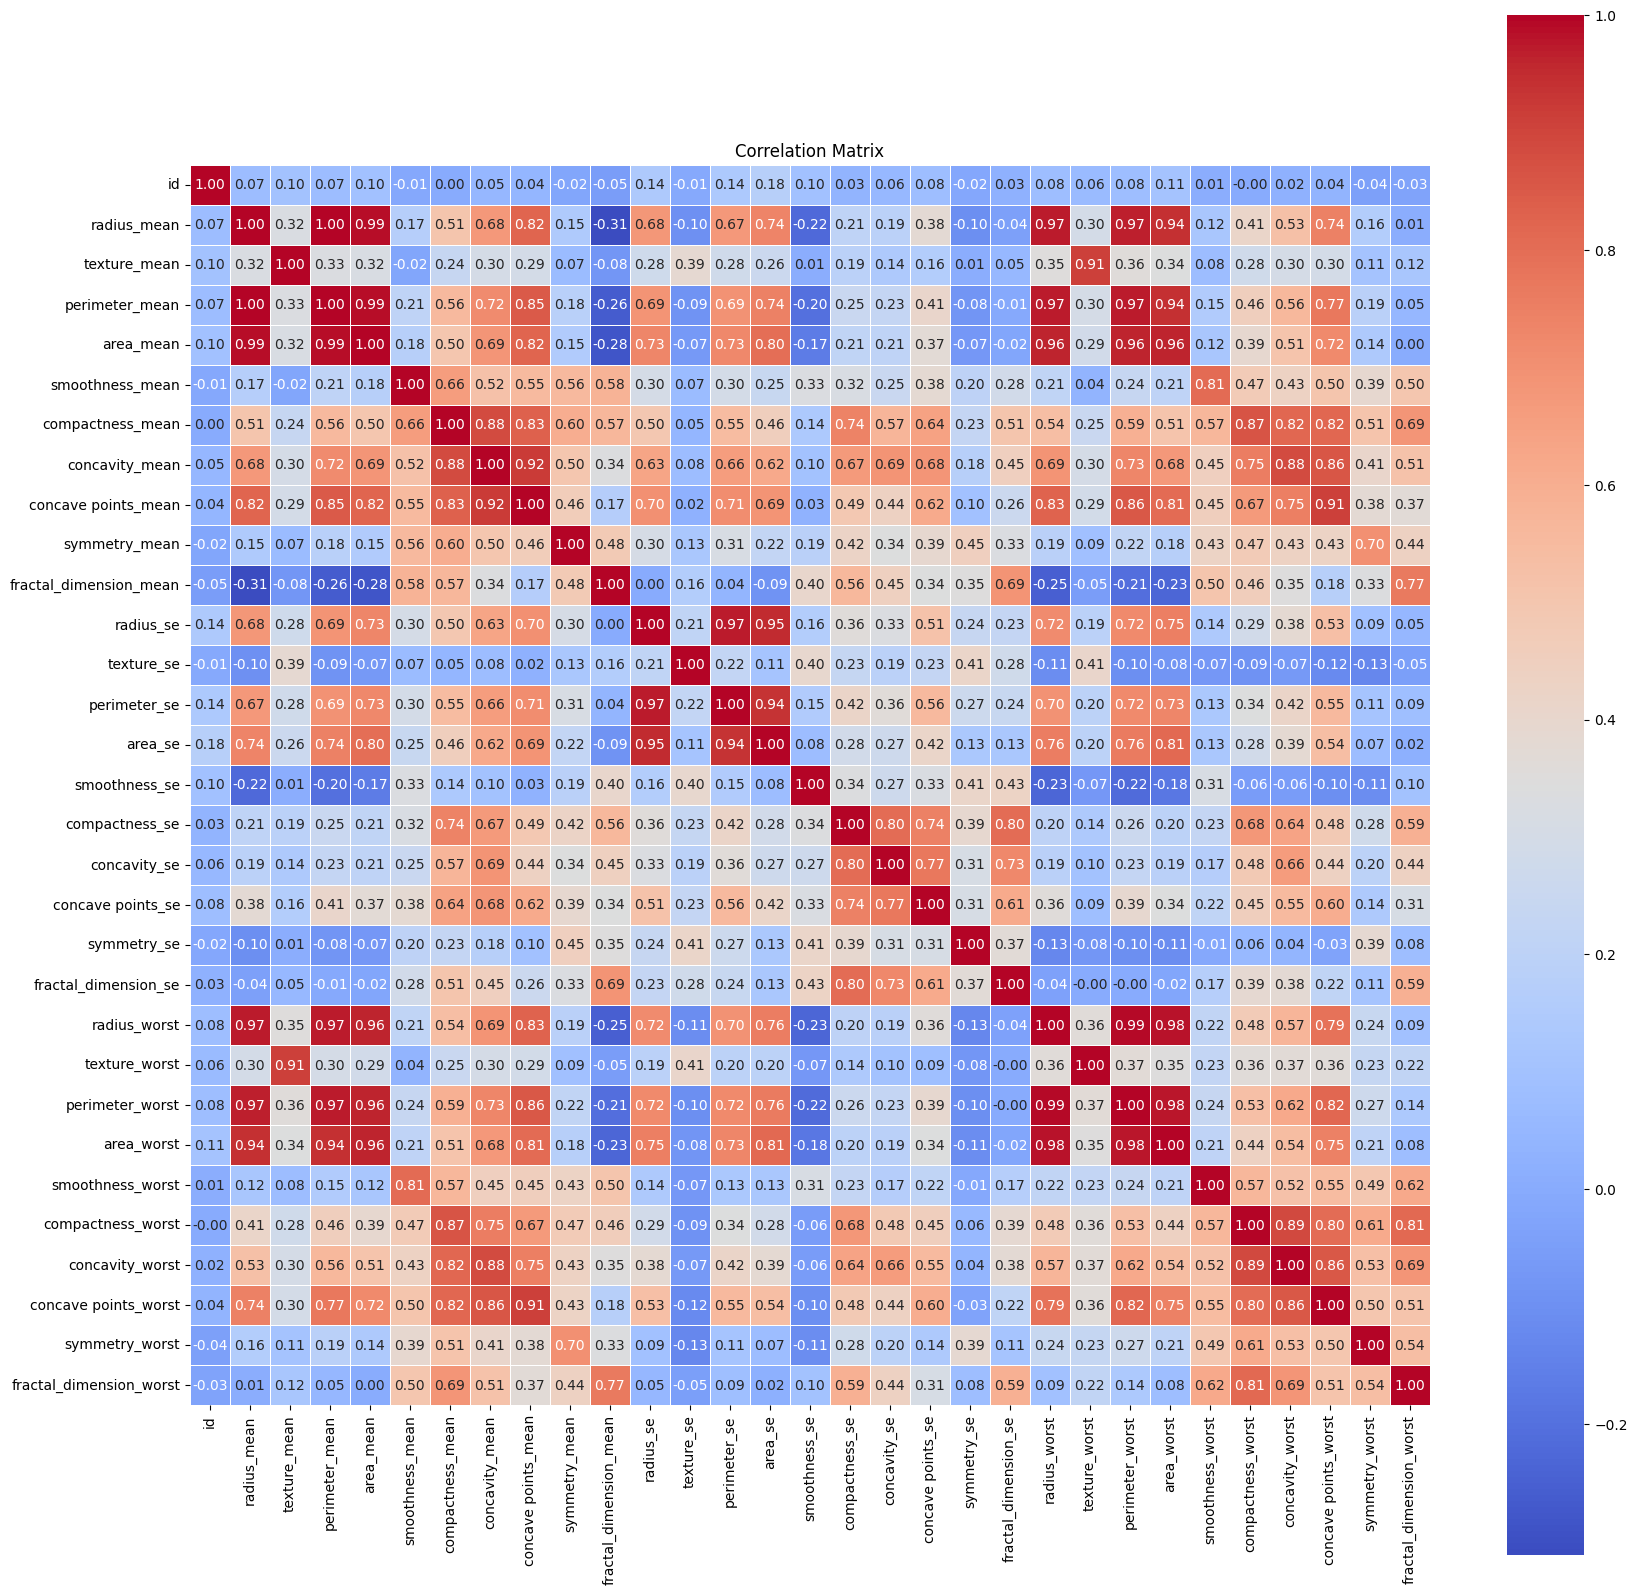

In [102]:
# correlation matrix of all data, but the x labels are not readable, so make it vertical
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Matrix')
plt.show()

In [103]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

<h1>Data Preprocessing

In [104]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [105]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [106]:
df.duplicated().sum()

np.int64(0)

In [107]:
df.drop(columns=['id'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [108]:
numeric_df = numeric_df.drop(columns=['id'])
skew_values = numeric_df.skew().sort_values(ascending=False)
print(skew_values)


area_se                    5.447186
concavity_se               5.110463
fractal_dimension_se       3.923969
perimeter_se               3.443615
radius_se                  3.088612
smoothness_se              2.314450
symmetry_se                2.195133
compactness_se             1.902221
area_worst                 1.859373
fractal_dimension_worst    1.662579
texture_se                 1.646444
area_mean                  1.645732
compactness_worst          1.473555
concave points_se          1.444678
symmetry_worst             1.433928
concavity_mean             1.401180
fractal_dimension_mean     1.304489
compactness_mean           1.190123
concave points_mean        1.171180
concavity_worst            1.150237
perimeter_worst            1.128164
radius_worst               1.103115
perimeter_mean             0.990650
radius_mean                0.942380
symmetry_mean              0.725609
texture_mean               0.650450
texture_worst              0.498321
concave points_worst       0

In [109]:

skewed_cols = skew_values[skew_values.abs() >= 1].index.tolist()

pt = PowerTransformer(method='yeo-johnson')
df_skewed_transformed = pd.DataFrame(pt.fit_transform(numeric_df[skewed_cols]), 
                                     columns=skewed_cols)

numeric_df[skewed_cols] = df_skewed_transformed
df = pd.concat([numeric_df, df.drop(columns=numeric_df.columns)], axis=1)

numeric_df = df.select_dtypes(include=[np.number])
skew_values = numeric_df.skew().sort_values(ascending=False)

print(skew_values)

perimeter_mean             0.990650
radius_mean                0.942380
symmetry_mean              0.725609
texture_mean               0.650450
texture_worst              0.498321
concave points_worst       0.492616
smoothness_mean            0.456324
smoothness_worst           0.415426
fractal_dimension_se       0.234550
concavity_mean             0.223924
compactness_se             0.204970
concave points_mean        0.198740
radius_se                  0.194796
concavity_se               0.145901
symmetry_se                0.135894
compactness_mean           0.105564
compactness_worst          0.091660
concavity_worst            0.085410
smoothness_se              0.084004
fractal_dimension_worst    0.081748
perimeter_se               0.080793
area_se                    0.069306
fractal_dimension_mean     0.036216
radius_worst               0.033651
perimeter_worst            0.031123
area_worst                 0.026797
texture_se                 0.013032
area_mean                  0

In [110]:
x = df.drop(columns=['diagnosis'])
y = df['diagnosis'].map({'M': 1, 'B': 0})

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

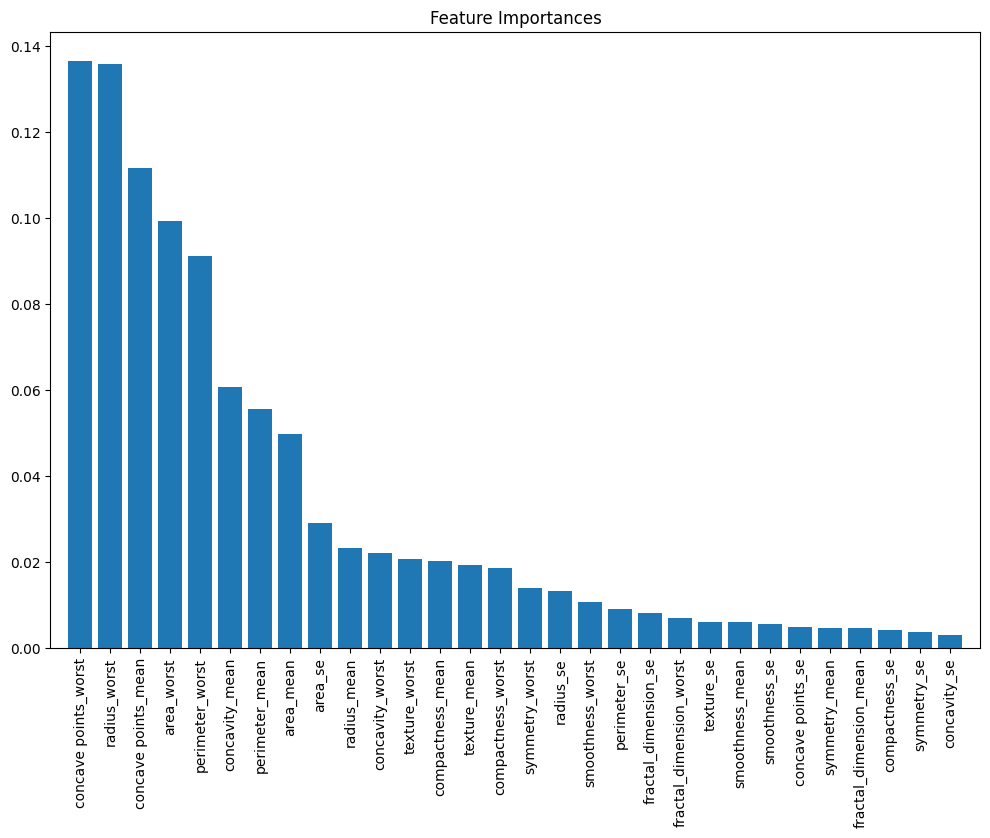

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(x.shape[1]), importances[indices], align='center')
plt.xticks(range(x.shape[1]), x.columns[indices], rotation=90)
plt.xlim([-1, x.shape[1]])
plt.show()

Model CV Accuracy: 0.9736 ± 0.0197
Model Test Accuracy: 0.9825
Time to train: 0.0390 seconds
Time to predict: 0.0010037422180175781 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



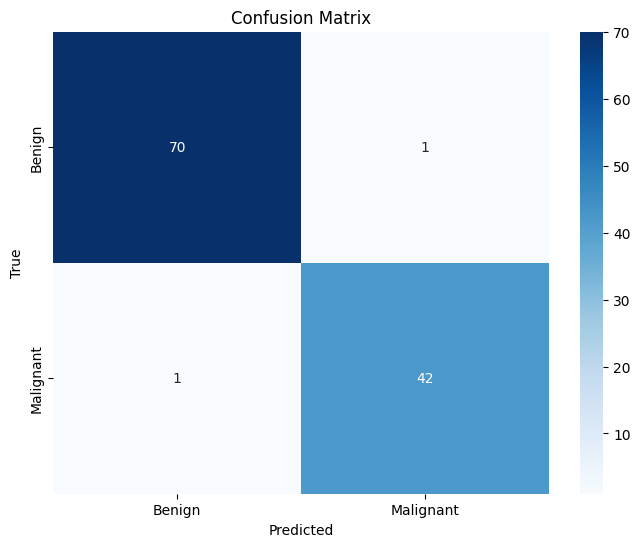

In [112]:
model_lg = LogisticRegression()
start_tr = time.time()
cv_scores = cross_val_score(model_lg, x_scaled, y, cv=10, scoring='accuracy')
end_tr = time.time()
print(f'Model CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

lr = cv_scores.mean()

model_lg.fit(x_train, y_train)
start_pr = time.time()
y_pred = model_lg.predict(x_test)
end_pr = time.time()
print(f'Model Test Accuracy: {accuracy_score(y_test, y_pred):.4f}')

print(f'Time to train: {end_tr - start_tr:.4f} seconds')
print(f'Time to predict: {end_pr - start_pr} seconds')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))


cm_lg = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lg, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Fitting 10 folds for each of 90 candidates, totalling 900 fits
Tuned Model CV Accuracy: 0.9802 ± 0.0206
Tuned Model Test Accuracy: 0.9825
Time to train: 10.6316 seconds
Time to predict: 0.0 seconds

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



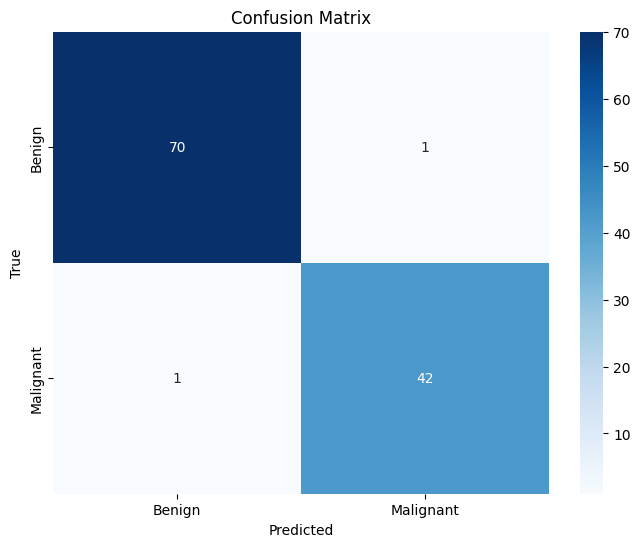

In [113]:
param_grid = [
    {
        'penalty': ['l1', 'l2', None],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['saga'],
        'max_iter': [100, 500, 1000]
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['saga'],
        'max_iter': [100, 500, 1000],
        'l1_ratio': [0.3, 0.5, 0.7]
    }
]
start_tr = time.time()
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)
end_tr = time.time()

cv_results = pd.DataFrame(grid_search.cv_results_)
best_index = grid_search.best_index_
std_dev = cv_results.loc[best_index, 'std_test_score']
mean_score = cv_results.loc[best_index, 'mean_test_score']
print(f'Tuned Model CV Accuracy: {mean_score:.4f} ± {std_dev:.4f}')

lr_tuned = mean_score

best_model = grid_search.best_estimator_
start_pr = time.time()
y_pred_tuned = best_model.predict(x_test)
end_pr = time.time()
print(f'Tuned Model Test Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}')

print(f'Time to train: {end_tr - start_tr:.4f} seconds')
print(f'Time to predict: {end_pr - start_pr} seconds')

print('\nClassification Report (Tuned Model):')
print(classification_report(y_test, y_pred_tuned))

cm_lg = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lg, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Model CV Accuracy: 0.9632 ± 0.0318
Model Test Accuracy: 0.9649
Time to train: 1.4890 seconds
Time to predict: 0.002005338668823242 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



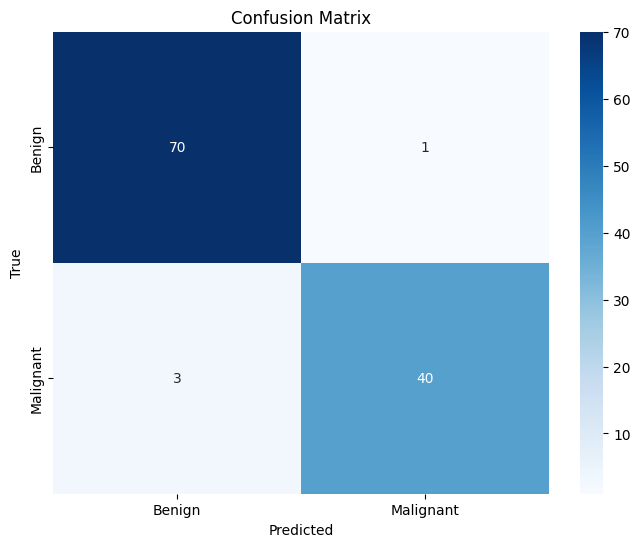

In [114]:
model_rf = RandomForestClassifier(random_state=42)
start_tr = time.time()
cv_scores = cross_val_score(model_rf, x_scaled, y, cv=10, scoring='accuracy')
end_tr = time.time()
print(f'Model CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

rf = cv_scores.mean()

model_rf.fit(x_train, y_train)
start_pr = time.time()
y_pred = model_rf.predict(x_test)
end_pr = time.time()
print(f'Model Test Accuracy: {accuracy_score(y_test, y_pred):.4f}')

print(f'Time to train: {end_tr - start_tr:.4f} seconds')
print(f'Time to predict: {end_pr - start_pr} seconds')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

cm_lg = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lg, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Tuned Model CV Accuracy: 0.9736 ± 0.0163
Tuned Model Test Accuracy: 0.9649
Time to train: 31.2767 seconds
Time to predict: 0.005998373031616211 seconds

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



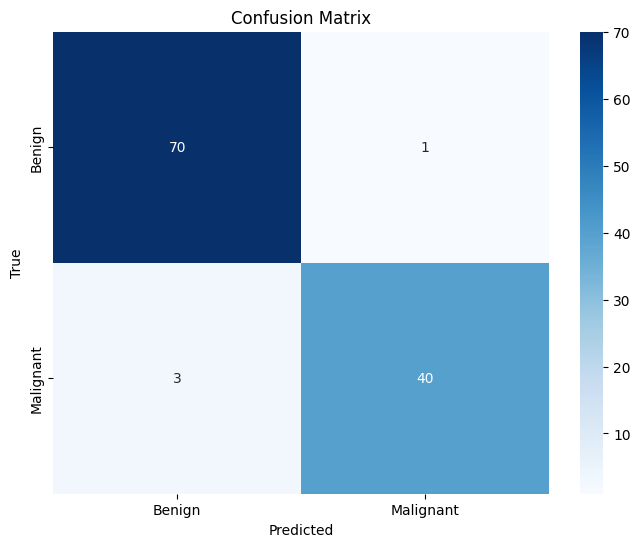

In [115]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], 
}

start_tr = time.time()
grid_search = GridSearchCV(rf_model, param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)
end_tr = time.time()

cv_results = pd.DataFrame(grid_search.cv_results_)
best_index = grid_search.best_index_
std_dev = cv_results.loc[best_index, 'std_test_score']
mean_score = cv_results.loc[best_index, 'mean_test_score']
print(f'Tuned Model CV Accuracy: {mean_score:.4f} ± {std_dev:.4f}')

rf_tuned = mean_score

best_model = grid_search.best_estimator_
start_pr = time.time()
y_pred_tuned = best_model.predict(x_test)
end_pr = time.time()
print(f'Tuned Model Test Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}')

print(f'Time to train: {end_tr - start_tr:.4f} seconds')
print(f'Time to predict: {end_pr - start_pr} seconds')

print('\nClassification Report (Tuned Model):')
print(classification_report(y_test, y_pred_tuned))

cm_lg = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lg, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [116]:
print(f'Logistic Regression CV Accuracy: {lr:.4f}')
print(f'Logistic Regression Tuned CV Accuracy: {lr_tuned:.4f}')
print(f'Random Forest CV Accuracy: {rf:.4f}')
print(f'Random Forest Tuned CV Accuracy: {rf_tuned:.4f}')

Logistic Regression CV Accuracy: 0.9736
Logistic Regression Tuned CV Accuracy: 0.9802
Random Forest CV Accuracy: 0.9632
Random Forest Tuned CV Accuracy: 0.9736
